In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

data = pd.read_csv("indian_liver_patient.csv")

data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


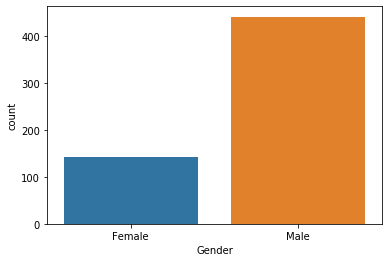

In [14]:
sns.countplot(data["Gender"])

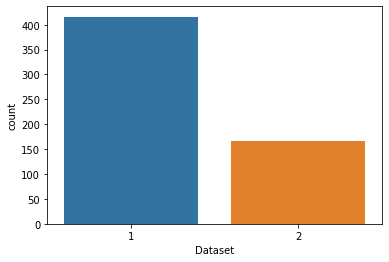

In [15]:
sns.countplot(data["Dataset"])

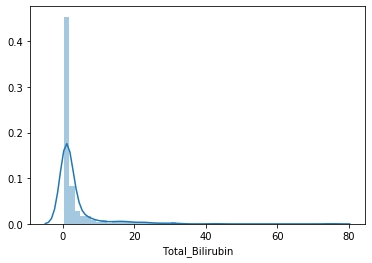

In [16]:
sns.distplot(data["Total_Bilirubin"])

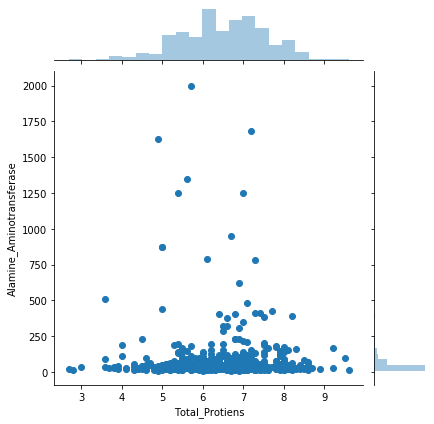

In [25]:
sns.jointplot(x="Total_Protiens", y="Alamine_Aminotransferase", data=data)

/home/aarroyoc/.local/share/virtualenvs/KaggleCompetitions-6arNNYaG/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/aarroyoc/.local/share/virtualenvs/KaggleCompetitions-6arNNYaG/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


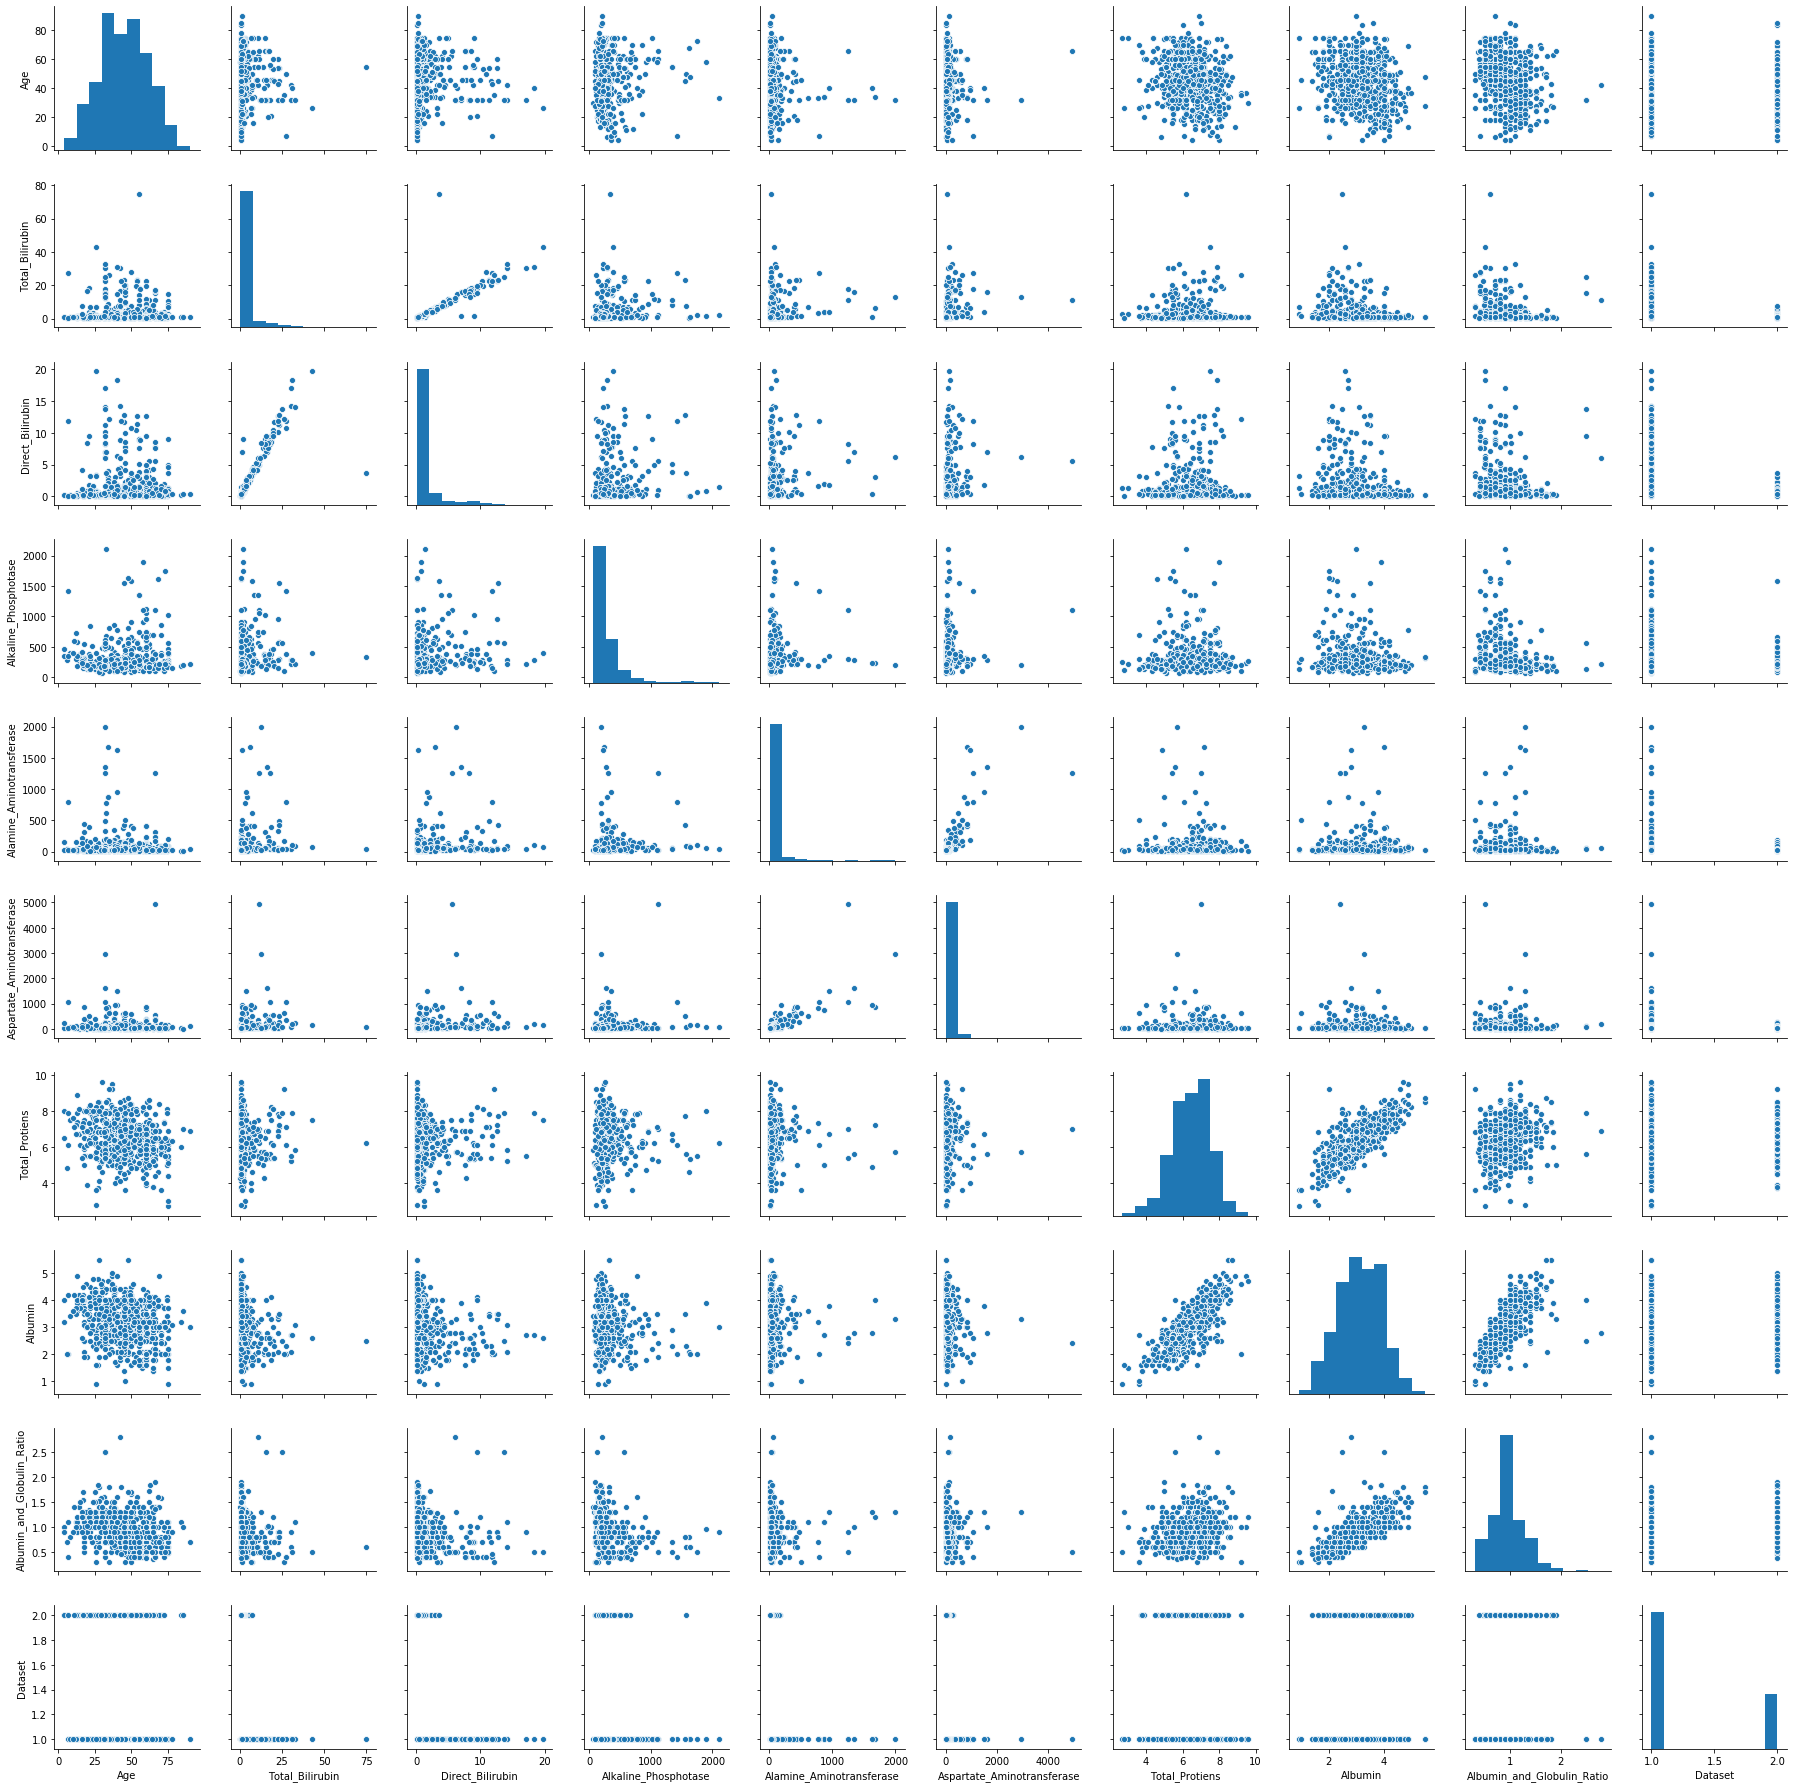

In [26]:
sns.pairplot(data)

In [37]:
data.isna().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
Gender_Female                 0
Gender_Male                   0
dtype: int64

In [245]:
data["Albumin_and_Globulin_Ratio"] = data["Albumin_and_Globulin_Ratio"].fillna(data["Albumin_and_Globulin_Ratio"].median())

In [246]:
data.isna().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
Gender_Female                 0
Gender_Male                   0
dtype: int64

In [247]:
data = pd.get_dummies(data)

X = data.drop(columns=["Dataset"])
Y = data["Dataset"]

In [382]:
from sklearn.model_selection import train_test_split


train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=1/3,stratify=Y,random_state=2)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_split=4, max_features=4)
tree.fit(train_x, train_y)
predict_y = tree.predict(test_x)

np.sum(predict_y == test_y)/test_y.shape[0]

0.7230769230769231

In [383]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(criterion="gini", max_depth=None, min_samples_split=2, max_features=4, n_estimators=100)
tree.fit(train_x, train_y)
predict_y = tree.predict(test_x)

np.sum(predict_y == test_y)/test_y.shape[0]

0.6923076923076923

In [329]:
import xgboost as xgb

res = dict()

for d in range(1,10):
    for l in range(1,9):
        for m in range(1,5):
            for g in range(0,10):
                tree = xgb.XGBClassifier(max_depth=d, learning_rate=l/100, n_estimators=100, objective="binary:logistic", booster="gbtree", n_jobs=4, min_child_weight=m, gamma=g/10)
                tree.fit(train_x, train_y)
                predict_y = tree.predict(test_x)

                res[(d,l,n,booster,m,g)] = np.sum(predict_y == test_y)/test_y.shape[0]
                print(res[(d,l,n,booster,m,g)])
max(res, key=res.get)

0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128205128
0.7128205128

KeyboardInterrupt: 

In [385]:
tree = xgb.XGBClassifier(max_depth=7, learning_rate=8/100, n_estimators=100, objective="binary:logistic", booster="gbtree", n_jobs=4, min_child_weight=3, gamma=3/10)
tree.fit(train_x, train_y)
predict_y = tree.predict(test_x)
np.sum(predict_y == test_y)/test_y.shape[0]

0.6820512820512821

In [264]:
res[(7,8,19,"gbtree",3,3)]

0.764102564102564

In [259]:
from sklearn.svm import SVC

svm = SVC(C=1, kernel="rbf", degree=3, max_iter=50000, gamma="auto")
svm.fit(train_x, train_y)
predict_y = svm.predict(test_x)

np.sum(predict_y == test_y)/test_y.shape[0]

0.7282051282051282

In [260]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation="logistic", solver="adam", max_iter=5000)
mlp.fit(train_x, train_y)
predict_y = mlp.predict(test_x)

np.sum(predict_y == test_y)/test_y.shape[0]

0.7128205128205128

In [261]:
from sklearn.neighbors import KNeighborsClassifier

res = dict()

for n in range(1,21,2):
    for p in range(1,10):
        knn = KNeighborsClassifier(n_neighbors=n, p=p, metric="minkowski")
        knn.fit(train_x, train_y)
        predict_y = knn.predict(test_x)
        
        res[(n,p)] = np.sum(predict_y == test_y)/test_y.shape[0]


max(res, key=res.get)

(7, 8)

In [262]:
res[(7,8)]

0.7487179487179487